## ✒️ Code Modules & Settings

In [ ]:
import os,io,pathlib,pylab as pl
import scipy.misc,numpy as np
from six import BytesIO
from PIL import Image,ImageDraw,ImageFont
from six.moves.urllib.request import urlopen
import tensorflow as tf,tensorflow_hub as hub
tf.get_logger().setLevel('ERROR')

In [ ]:
!python -m pip install --upgrade pip \
--user --quiet --no-warn-script-location
!git clone --depth 1 https://github.com/tensorflow/models --quiet 

fatal: destination path 'models' already exists and is not an empty directory.


In [ ]:
%%bash
python -m pip install protobuf-compiler --quiet 
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install . --quiet 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.18.0 which is incompatible.
tensorboard 2.4.1 requires grpcio>=1.24.3, but you have grpcio 1.18.0 which is incompatible.
apache-beam 2.28.0 requires grpcio<2,>=1.29.0, but you have grpcio 1.18.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
protobuf-compiler 1.0.20 requires grpcio==1.18.0, but you have grpcio 1.32.0 which is incompatible.


## ✒️ Models

In [ ]:
spath='root/.local/bin'
import sys; sys.path.append(spath)
from object_detection.utils import \
label_map_util,ops as utils_ops,visualization_utils as viz_utils
PATH_TO_LABELS='./models/research/object_detection/'+\
               'data/mscoco_label_map.pbtxt'
category_index=label_map_util\
.create_category_index_from_labelmap(
    PATH_TO_LABELS,use_display_name=True)

In [ ]:
# @title Setup the Dictionary with All the Models
all_models={
'CenterNet HourGlass104 512x512':
'https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1',
'CenterNet HourGlass104 Keypoints 512x512':
'https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1',
'CenterNet HourGlass104 1024x1024':
'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024/1',
'CenterNet HourGlass104 Keypoints 1024x1024':
'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024_kpts/1',
'CenterNet Resnet50 V1 FPN 512x512':
'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512/1',
'CenterNet Resnet50 V1 FPN Keypoints 512x512':
'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1',
'CenterNet Resnet101 V1 FPN 512x512':
'https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1',
'CenterNet Resnet50 V2 512x512':
'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512/1',
'CenterNet Resnet50 V2 Keypoints 512x512':
'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512_kpts/1',
'EfficientDet D0 512x512':
'https://tfhub.dev/tensorflow/efficientdet/d0/1',
'EfficientDet D1 640x640':
'https://tfhub.dev/tensorflow/efficientdet/d1/1',
'EfficientDet D2 768x768':
'https://tfhub.dev/tensorflow/efficientdet/d2/1',
'EfficientDet D3 896x896':
'https://tfhub.dev/tensorflow/efficientdet/d3/1',
'EfficientDet D4 1024x1024':
'https://tfhub.dev/tensorflow/efficientdet/d4/1',
'EfficientDet D5 1280x1280':
'https://tfhub.dev/tensorflow/efficientdet/d5/1',
'EfficientDet D6 1280x1280':
'https://tfhub.dev/tensorflow/efficientdet/d6/1',
'EfficientDet D7 1536x1536':
'https://tfhub.dev/tensorflow/efficientdet/d7/1',
'SSD MobileNet v2 320x320':
'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2',
'SSD MobileNet V1 FPN 640x640':
'https://tfhub.dev/tensorflow/ssd_mobilenet_v1/fpn_640x640/1',
'SSD MobileNet V2 FPNLite 320x320':
'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1',
'SSD MobileNet V2 FPNLite 640x640':
'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1',
'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)':
'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1',
'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)':
'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1',
'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)':
'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_640x640/1',
'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)':
'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_1024x1024/1',
'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)':
'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_640x640/1',
'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)':
'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_1024x1024/1',
'Faster R-CNN ResNet50 V1 640x640':
'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1',
'Faster R-CNN ResNet50 V1 1024x1024':
'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1',
'Faster R-CNN ResNet50 V1 800x1333':
'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_800x1333/1',
'Faster R-CNN ResNet101 V1 640x640':
'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1',
'Faster R-CNN ResNet101 V1 1024x1024':
'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1',
'Faster R-CNN ResNet101 V1 800x1333':
'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_800x1333/1',
'Faster R-CNN ResNet152 V1 640x640':
'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1',
'Faster R-CNN ResNet152 V1 1024x1024':
'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1',
'Faster R-CNN ResNet152 V1 800x1333':
'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_800x1333/1',
'Faster R-CNN Inception ResNet V2 640x640':
'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1',
'Faster R-CNN Inception ResNet V2 1024x1024':
'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1',
'Mask R-CNN Inception ResNet V2 1024x1024':
'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
}

In [ ]:
#@title Model Selection { display-mode: "form", run: "auto" }
model_display_name='Faster R-CNN ResNet152 V1 1024x1024' # @param ['CenterNet HourGlass104 512x512','CenterNet HourGlass104 Keypoints 512x512','CenterNet HourGlass104 1024x1024','CenterNet HourGlass104 Keypoints 1024x1024','CenterNet Resnet50 V1 FPN 512x512','CenterNet Resnet50 V1 FPN Keypoints 512x512','CenterNet Resnet101 V1 FPN 512x512','CenterNet Resnet50 V2 512x512','CenterNet Resnet50 V2 Keypoints 512x512','EfficientDet D0 512x512','EfficientDet D1 640x640','EfficientDet D2 768x768','EfficientDet D3 896x896','EfficientDet D4 1024x1024','EfficientDet D5 1280x1280','EfficientDet D6 1280x1280','EfficientDet D7 1536x1536','SSD MobileNet v2 320x320','SSD MobileNet V1 FPN 640x640','SSD MobileNet V2 FPNLite 320x320','SSD MobileNet V2 FPNLite 640x640','SSD ResNet50 V1 FPN 640x640 (RetinaNet50)','SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)','SSD ResNet101 V1 FPN 640x640 (RetinaNet101)','SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)','SSD ResNet152 V1 FPN 640x640 (RetinaNet152)','SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)','Faster R-CNN ResNet50 V1 640x640','Faster R-CNN ResNet50 V1 1024x1024','Faster R-CNN ResNet50 V1 800x1333','Faster R-CNN ResNet101 V1 640x640','Faster R-CNN ResNet101 V1 1024x1024','Faster R-CNN ResNet101 V1 800x1333','Faster R-CNN ResNet152 V1 640x640','Faster R-CNN ResNet152 V1 1024x1024','Faster R-CNN ResNet152 V1 800x1333','Faster R-CNN Inception ResNet V2 640x640','Faster R-CNN Inception ResNet V2 1024x1024','Mask R-CNN Inception ResNet V2 1024x1024']
model_handle=all_models[model_display_name]
print('selected model: %s'%model_display_name)
print('model handle at TensorFlow Hub: %s'%model_handle)

selected model: Faster R-CNN ResNet152 V1 1024x1024
model handle at TensorFlow Hub: https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1


In [ ]:
print('loading model...')
hub_model=hub.load(model_handle)
print('model loaded!')

loading model...
model loaded!


## ✒️ Images

In [ ]:
def load_image_into_numpy_array(path):
    img=None
    if (path.startswith('http')):
        response=urlopen(path)
        img_data=response.read()
        img_data=BytesIO(img_data)
        img=Image.open(img_data)
    else:
        img_data=tf.io.gfile.GFile(path,'rb').read()
        img=Image.open(BytesIO(img_data))
    (img_width,img_height)=img.size
    return np.array(img.getdata()).reshape(
        (1,img_height,img_width,3)).astype(np.uint8)
%matplotlib inline

In [ ]:
COCO17_HUMAN_POSE_KEYPOINTS=\
[(0,1),(0,2),(1,3),(2,4),(0,5),(0,6),
 (5,7),(7,9),(6,8),(8,10),(5,6),(5,11),
 (6,12),(11,12),(11,13),(13,15),(12,14),(14,16)]

In [ ]:
file_path='https://olgabelitskaya.gitlab.io/data/'
images_dict={
    'squirrel':file_path+'animals/'+'00_00_001.png',
    'urban lights':file_path+'urban/'+'01_00_002.png',
    'ducks':file_path+'birds/'+'00_02_003.png',
    'science lesson':file_path+'humans/'+'01_00_001.png',
    'butterflies':file_path+'butterflies/'+'00_00_00_001.png',
    'insects':file_path+'butterflies/'+'00_01_00_002.png',
    'illuminations':file_path+'urban/'+'01_00_004.png',
    'dusk':file_path+'urban/'+'02_00_001.png'
}

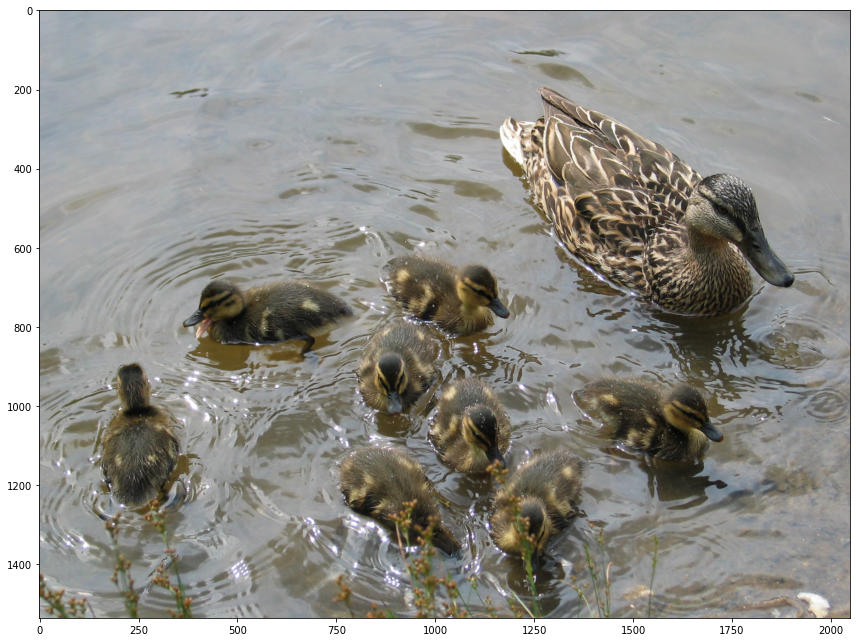

In [ ]:
selected_img='ducks'
flip_image_horizontally=False
convert_image_to_grayscale=False
rotate_image_90=0
img_path=images_dict[selected_img]
img_np=load_image_into_numpy_array(img_path)
if (flip_image_horizontally):
    img_np[0]=np.fliplr(img_np[0]).copy()
if (convert_image_to_grayscale):
    img_np[0]=np.tile(
        np.mean(img_np[0],2,keepdims=True),(1,1,3))\
    .astype(np.uint8)
for i in range(rotate_image_90):
    img_np=tf.image.rot90(img_np).numpy().copy()
pl.figure(figsize=(12,16))
pl.imshow(img_np[0])
pl.tight_layout(); pl.show()

## ✒️ Object Detection

In [ ]:
results=hub_model(img_np)
result={key:value.numpy() for key,value in results.items()}
print(list(result.keys())[:5])
print(list(result.keys())[5:])
print(result['detection_classes'][0])

['detection_anchor_indices', 'detection_multiclass_scores', 'detection_classes', 'num_detections', 'detection_boxes']
['raw_detection_boxes', 'detection_scores', 'raw_detection_scores']
[16. 16. 16. 16. 16. 16. 16. 23. 23. 16. 16. 22. 24. 18. 18. 17. 23. 17.
 22.  5. 22. 17. 22. 18. 38. 23. 22. 38. 18. 17. 17. 22.  9. 23. 88. 88.
 16. 23. 20. 23. 18. 20. 20. 20. 16. 16. 18. 25. 16. 20. 22. 24. 16. 17.
 23. 16. 52. 16. 18. 23. 23. 56. 22.  1. 16. 20. 18. 16. 40. 16. 20. 16.
 16. 10. 16. 17. 16.  1. 17. 56. 23. 10. 52. 20. 16. 16. 16. 16. 16. 16.
 16. 52. 16. 86. 24. 86. 16. 44. 16. 67. 11. 56. 16. 16. 16. 44. 16. 28.
 23. 88.  1. 16. 24. 24. 56. 16. 18. 40. 16. 17. 22. 24. 16. 23. 16. 24.
 52. 52. 44. 44. 22. 16. 21. 52. 61. 88. 64. 61. 67. 40. 88. 52.  1. 44.
 57. 47. 48. 52. 16. 17. 50. 53. 44. 20. 55. 39. 16. 23.  1. 67. 61. 21.
 22. 52. 88. 21. 44. 85. 21. 11.  1. 15. 22. 88.  1. 46. 22.  1.  1. 44.
 56.  9. 16. 49.  1. 16. 22. 60. 56. 57. 23. 20. 67. 16. 15. 86. 20.  8.
 19. 21.  1

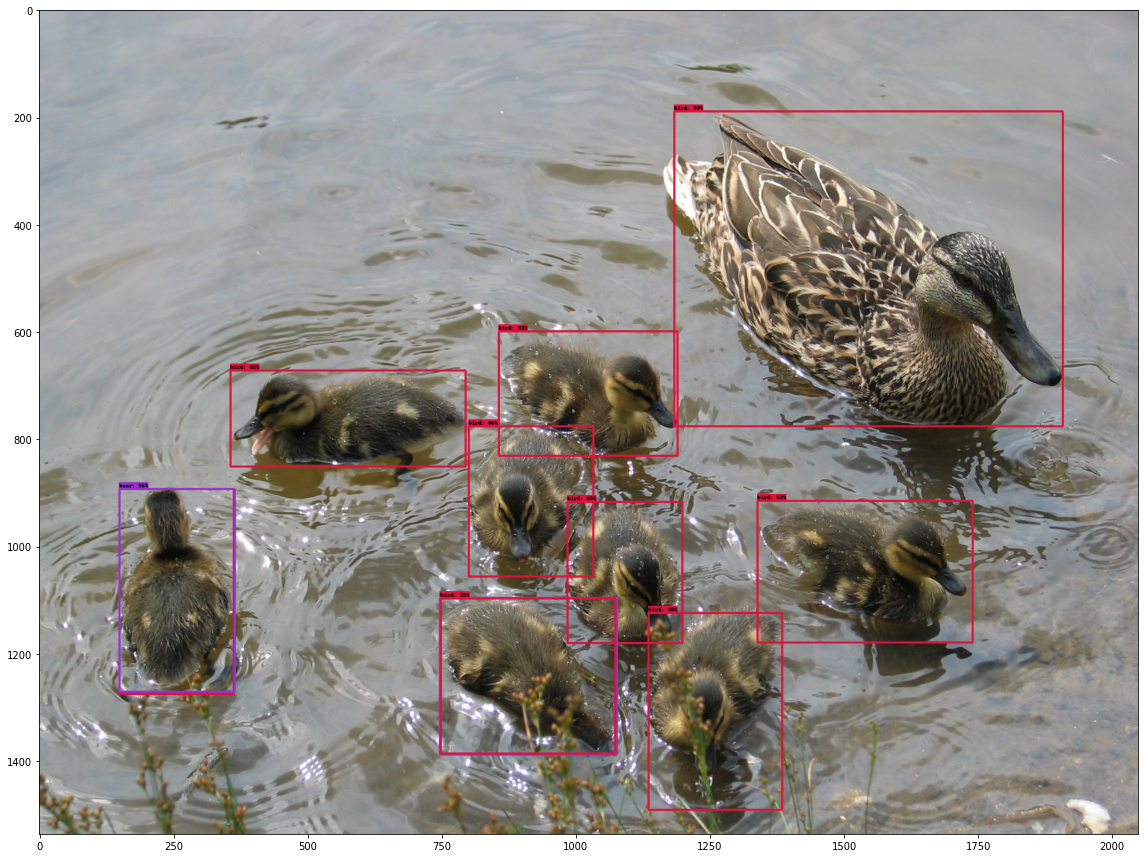

In [ ]:
label_id_offset=0
img_np_detections=img_np.copy()
keypoints,keypoint_scores=None,None
if 'detection_keypoints' in result:
    keypoints=result['detection_keypoints'][0]
    keypoint_scores=result['detection_keypoint_scores'][0]
viz_utils.visualize_boxes_and_labels_on_image_array(
      img_np_detections[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0]+\
       label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=100,
      min_score_thresh=.2,
      agnostic_mode=False,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores,
      keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)
pl.figure(figsize=(16,20))
pl.imshow(img_np_detections[0])
pl.tight_layout(); pl.show()

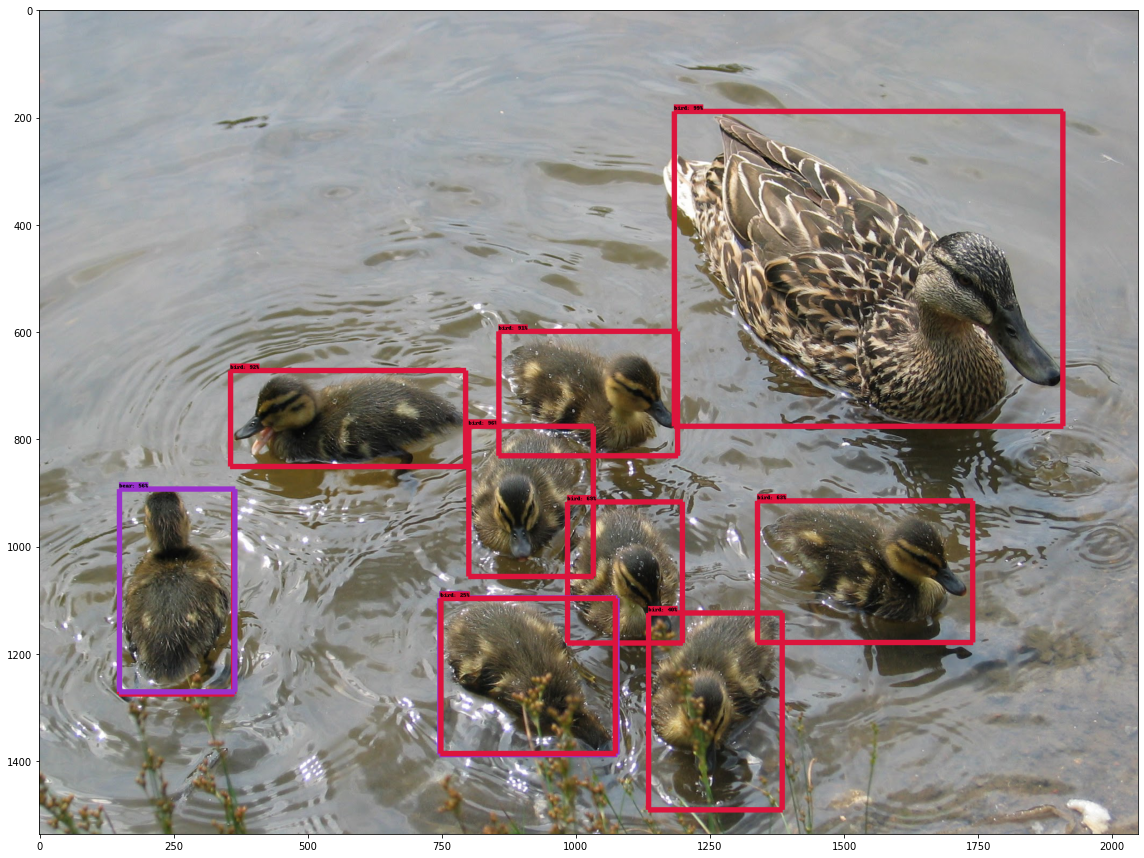

In [ ]:
img_np_mask=img_np.copy()
if 'detection_masks' in result:
    detection_masks=tf.convert_to_tensor(
        result['detection_masks'][0])
    detection_boxes=tf.convert_to_tensor(
        result['detection_boxes'][0])
    detection_masks_reframed=\
    utils_ops.reframe_box_masks_to_image_masks(
        detection_masks, detection_boxes,
        img_np.shape[1],img_np.shape[2])
    detection_masks_reframed=\
    tf.cast(detection_masks_reframed>.5,tf.uint8)
    result['detection_masks_reframed']=detection_masks_reframed.numpy()
viz_utils.visualize_boxes_and_labels_on_image_array(
      img_np_mask[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0]+\
       label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=100,
      min_score_thresh=.2,
      agnostic_mode=False,
      instance_masks=result.get('detection_masks_reframed',None),
      line_thickness=10)
pl.figure(figsize=(16,20))
pl.imshow(img_np_mask[0])
pl.tight_layout(); pl.show()